  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
       InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL         

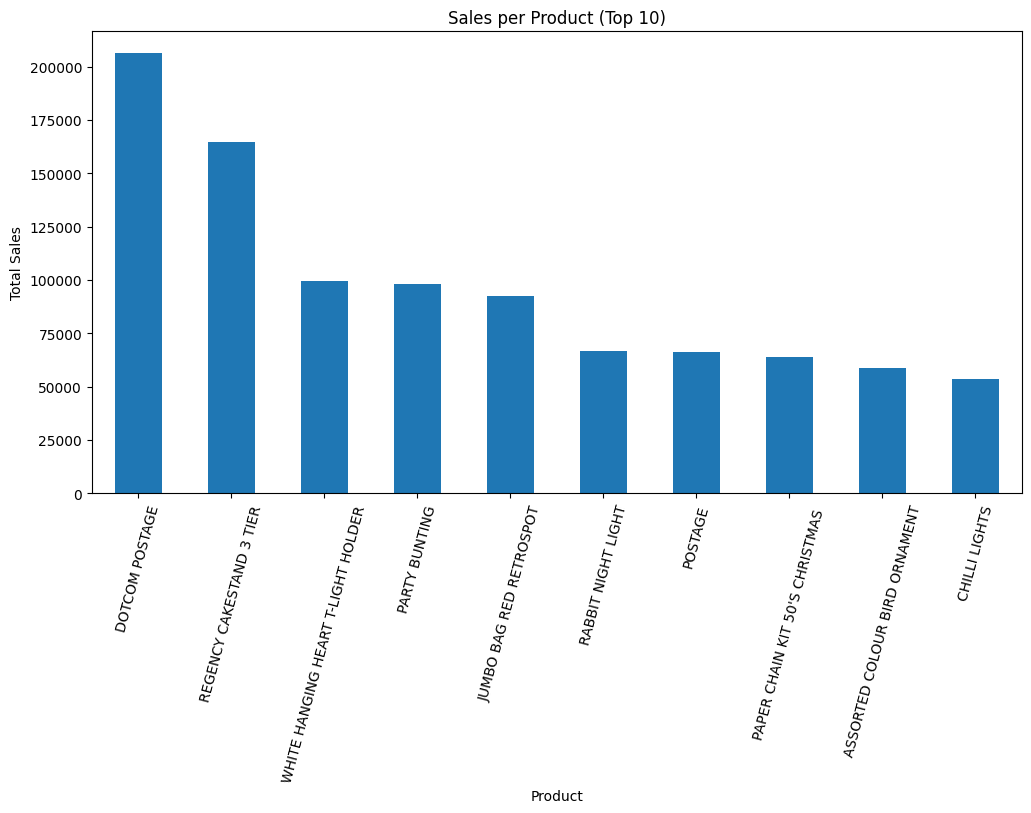

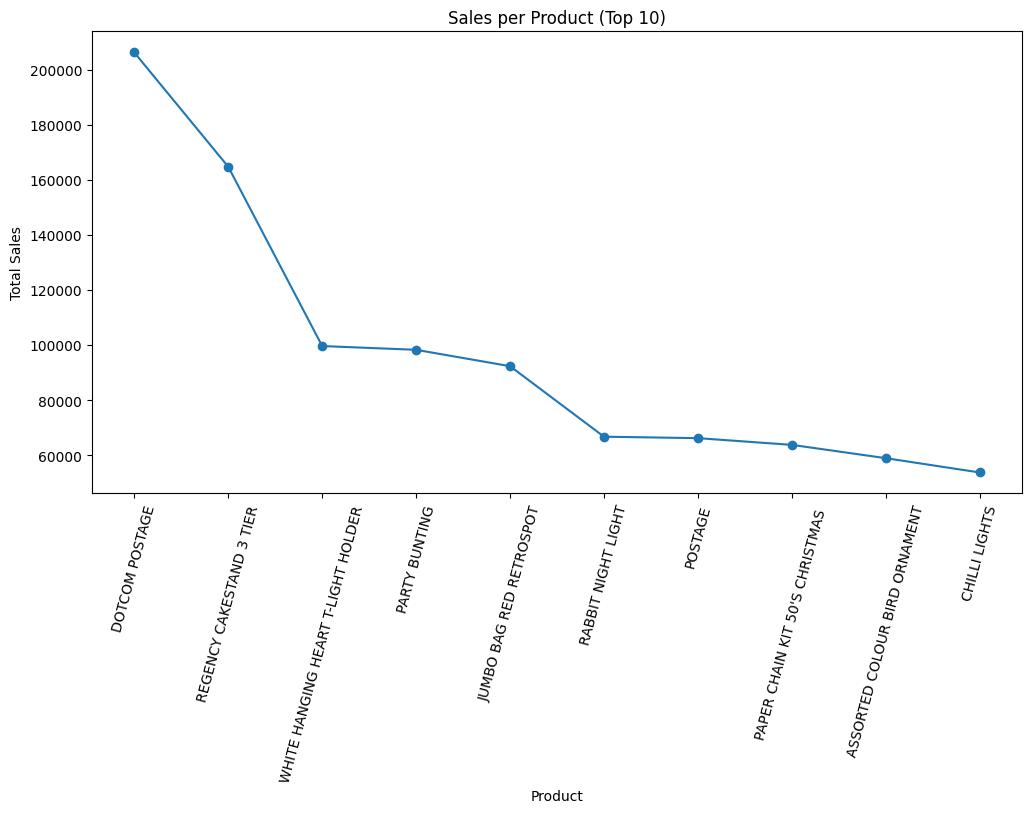

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(
    "/kaggle/input/ecommerce-data/data.csv",
    encoding="ISO-8859-1"
)

# Dataset inspection
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Clean data (IMPORTANT: use .copy())
df_clean = df.dropna(subset=["Description"]).copy()

# Create Sales column (warning-free)
df_clean["Sales"] = df_clean["Quantity"] * df_clean["UnitPrice"]

# Sales per product
sales_per_product = (
    df_clean
    .groupby("Description")["Sales"]
    .sum()
    .sort_values(ascending=False)
)

# Take Top 10 products for visualization
top_10_products = sales_per_product.head(10)

# Bar chart: Sales per Product
plt.figure(figsize=(12,6))
top_10_products.plot(kind="bar")
plt.title("Sales per Product (Top 10)")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.xticks(rotation=75)
plt.show()

# Line chart: Sales per Product
plt.figure(figsize=(12,6))
plt.plot(top_10_products.index, top_10_products.values, marker="o")
plt.title("Sales per Product (Top 10)")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.xticks(rotation=75)
plt.show()

